# GWTC-1: O1O2 CBC-Catalog paper Fig 11
## pycbc and gstlal search results, bg and sg models.
### This python notebook serves to document the contents of the data files and plot them. 
### LIGO Scientific Collaboration and Virgo Collaboration, November 2018

In [1]:
# standard imports
import numpy
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# matplotlib parameters for plotting
rc_params = {'backend': 'pdf',
             'axes.labelsize': 24,
             'axes.titlesize': 24,
             'font.size': 24,
             'legend.fontsize': 24,
             'xtick.labelsize': 24,
             'ytick.labelsize': 24,
             'font.family': 'serif',
             'font.sans-serif': ['Bitstream Vera Sans'],
             'font.serif': ['Times New Roman'],
             'text.usetex':True
            }

#column_width = 246.0
#inches_per_pt = 1.0/72.27
#fig_width = column_width * inches_per_pt
#rc_params['figure.figsize'] = (fig_width, fig_width/1.6)
plt.rcParams.update(rc_params)

In [3]:
# read in pycbc files with data for plotting
pycbc_fg = np.loadtxt('pycbc_fg_model.txt').T
pycbc_bg = np.loadtxt('pycbc_bg_model.txt').T
pycbc_ev = np.loadtxt('pycbc_candidates.txt').T

# Unpack the data for plotting. 
# This block serves to document the columns in the data files
# The terrestrial background model distribution:
ts_bg_cent = pycbc_bg[0]
lower1_Lbg = pycbc_bg[1]
higher1_Lbg = pycbc_bg[2]
lower2_Lbg = pycbc_bg[3]
higher2_Lbg = pycbc_bg[4]

# The foreground signal model distribution:
ts_fg_cent  = pycbc_fg[0]
nbg         = pycbc_fg[1]
nfg         = pycbc_fg[2]
lower1_Lfg  = pycbc_fg[3]
higher1_Lfg = pycbc_fg[4]
lower2_Lfg  = pycbc_fg[5]
higher2_Lfg = pycbc_fg[6]

# and their sum:
lower1_both  = pycbc_fg[7]
higher1_both = pycbc_fg[8]
lower2_both  = pycbc_fg[9]
higher2_both = pycbc_fg[10]

# and the search results:
cumnum = pycbc_ev[0]
pltcoincs = pycbc_ev[1]

event_names = ['GW150914', 'GW170814', 'GW170608', 'GW151226', 'GW170104', 'GW170809', 'GW170823', 'GW151012', 'GW170729']

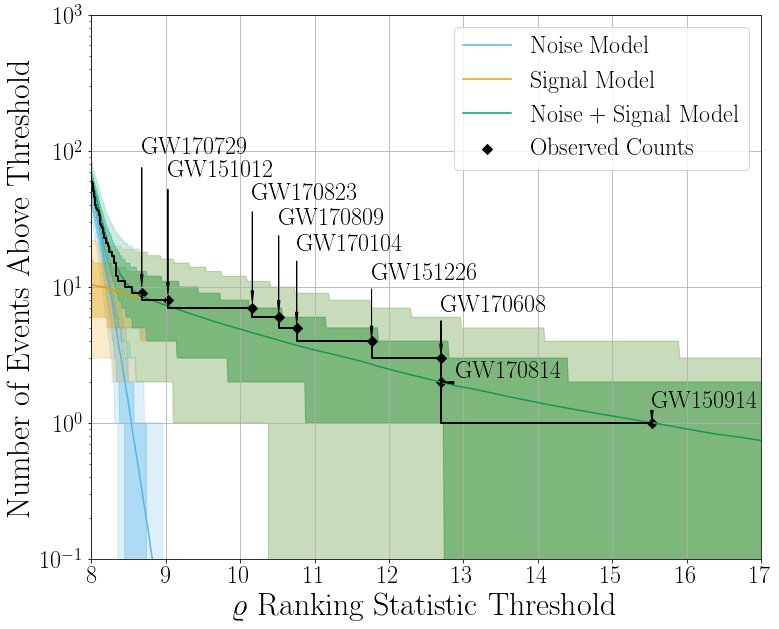

In [4]:
# For PyCBC:
# plot the cum events vs detection statistic threshold:
fig = plt.figure(figsize = (12.0, 10.0))
ax = fig.add_subplot(111, rasterized=True)

# plot background, foreground (signal) and bg+fg models
# color-blind friendly colors
ax.semilogy(ts_fg_cent, nbg, color = '#56B4E9', linewidth = 1.5, label = 'Noise Model')
ax.semilogy(ts_fg_cent, nfg, color = '#E69F00', linewidth = 1.5, label = 'Signal Model')
ax.semilogy(ts_fg_cent, nfg + nbg, color = '#009E73', linewidth = 1.5, label = 'Noise + Signal Model')
# plot statistical uncertainties on these models
ax.fill_between(ts_bg_cent, lower1_Lbg, higher1_Lbg, color = '#56B4E9', alpha = 0.35)
ax.fill_between(ts_bg_cent, lower2_Lbg, higher2_Lbg, color = '#56B4E9', alpha = 0.2)
ax.fill_between(ts_fg_cent, lower1_Lfg, higher1_Lfg, color = '#E69F00', alpha = 0.35)
ax.fill_between(ts_fg_cent, lower2_Lfg, higher2_Lfg, color = '#E69F00', alpha = 0.2)
ax.fill_between(ts_fg_cent, lower1_both, higher1_both, color = '#009E73', alpha = 0.35)
ax.fill_between(ts_fg_cent, lower2_both, higher2_both, color = '#009E73', alpha = 0.2)

# plot the data, and scatterplot of the loudest events:
ax.step(pltcoincs, cumnum, linewidth = 2, where='post', color='black')
plt.scatter(pltcoincs[:9], cumnum[:9], color = 'black', marker = 'D', s = 50, label = 'Observed Counts')

# annotate the loudest events
event_x = pltcoincs[:9]
event_y = cumnum[:9]
event_xt = event_x.copy()
event_yt = event_y * 1.3**(np.arange(9)+1)
event_xt[1] = event_x[1]+0.2 
event_yt[1] = event_y[1]*1.07
arrowp = dict(facecolor='black', shrink=0.05, width=.1, headwidth=2.5)
for i, txt in enumerate(event_names):
    ax.annotate(txt, xy = (event_x[i],event_y[i]), xytext = (event_xt[i],event_yt[i]), arrowprops = arrowp, fontsize=24)

# plot parameters
plt.ylabel(r'Number of Events Above Threshold',fontsize=32)
plt.xlabel(r'$\varrho$ Ranking Statistic Threshold',fontsize=32)
plt.ylim(1e-1, 1e3)
plt.xlim(8., 17.)
#plt.ylim(1e-1, 1e2)
#plt.xlim(8., 9.)
plt.yscale('log')
plt.legend(loc = 'best',fontsize=24)
plt.xticks(size = 24)
plt.yticks(size = 24)
#plt.grid(alpha='0.35')
plt.grid()

# save and display the plot:
plt.savefig('Fig11-pycbc_events_vs_stat.pdf')
plt.show()


In [5]:
# read in gstlal files with data for plotting
gstlal_logL_sg = np.loadtxt('gstlal_logL_sg.txt').T

# Unpack the data for plotting. 
# This block serves to document the columns in the data files
# The terrestrial background model distribution:
logL = gstlal_logL_sg[0]
logL_bins = gstlal_logL_sg[3]
noise_model = gstlal_logL_sg[1]
noise_model_lower_limit_1 = gstlal_logL_sg[4]
noise_model_upper_limit_1 = gstlal_logL_sg[5]
noise_model_lower_limit_2 = gstlal_logL_sg[6]
noise_model_upper_limit_2 = gstlal_logL_sg[7]

# The foreground signal model distribution:
signal_model_median = gstlal_logL_sg[2]
signal_model_lower_limit_1 = gstlal_logL_sg[8]
signal_model_upper_limit_1 = gstlal_logL_sg[9]
signal_model_lower_limit_2 = gstlal_logL_sg[10]
signal_model_upper_limit_2 = gstlal_logL_sg[11]

# and their sum:
signal_noise_model_lower_limit_1 = gstlal_logL_sg[12]
signal_noise_model_upper_limit_1 = gstlal_logL_sg[13]
signal_noise_model_lower_limit_2 = gstlal_logL_sg[14]
signal_noise_model_upper_limit_2 = gstlal_logL_sg[15]

# and the search results:
candidates = np.loadtxt('gstlal_candidates.txt').T
bg_candidates = np.loadtxt('gstlal_bg_candidates.txt').T
bg_cumnum = numpy.arange(1,len(bg_candidates)+1)[::-1]
cumnum = numpy.arange(1,len(candidates)+1)[::-1]

event_names = ['GW170817','GW150914','GW170814','GW170608','GW151226','GW170809','GW170823','GW170104','GW170818','GW151012','GW170729']

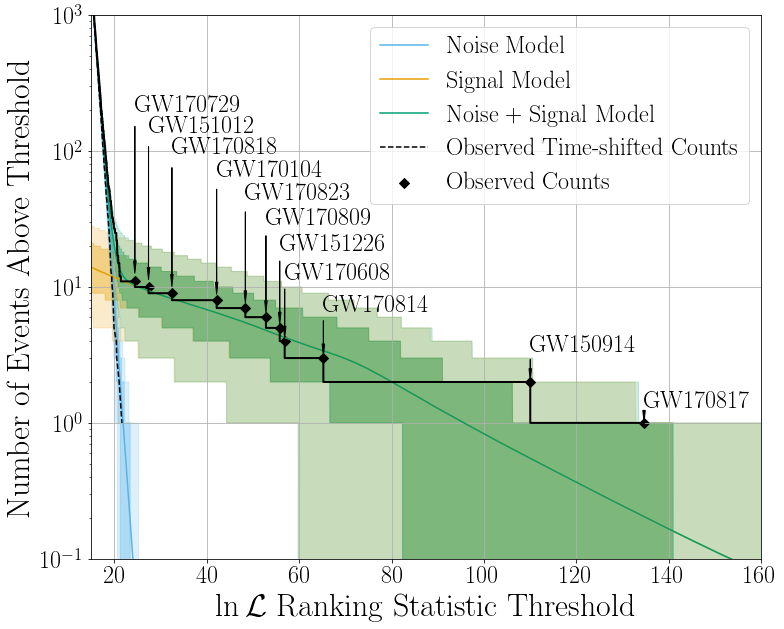

In [6]:
# For gstlal, LogL
# plot the cum events vs detection statistic threshold:
fig = plt.figure(figsize = (12.0, 10.0))
ax = fig.add_subplot(111, rasterized=True)

# plot background, foreground (signal) and bg+fg models
# color-blind friendly colors
ax.semilogy(logL, noise_model, color = '#56B4E9', linewidth = 1.5, label = 'Noise Model')
ax.semilogy(logL, signal_model_median, color = '#E69F00', linewidth = 1.5, label = 'Signal Model')
ax.semilogy(logL, signal_model_median + noise_model, color = '#009E73', linewidth = 1.5, label = 'Noise + Signal Model')
# plot statistical uncertainties on these models
ax.fill_between(logL_bins, noise_model_lower_limit_1, noise_model_upper_limit_1, color = '#56B4E9', alpha = 0.35)
ax.fill_between(logL_bins, noise_model_lower_limit_2, noise_model_upper_limit_2, color = '#56B4E9', alpha = 0.2)
ax.fill_between(logL_bins, signal_model_lower_limit_1, signal_model_upper_limit_1, color = '#E69F00', alpha = 0.35)
ax.fill_between(logL_bins, signal_model_lower_limit_2, signal_model_upper_limit_2, color = '#E69F00', alpha = 0.2)
ax.fill_between(logL, signal_noise_model_lower_limit_1, signal_noise_model_upper_limit_1, color = '#009E73', alpha = 0.35)
ax.fill_between(logL, signal_noise_model_lower_limit_2, signal_noise_model_upper_limit_2, color = '#009E73', alpha = 0.2)

# plot the data, and scatterplot of the loudest events:
ax.step(candidates, cumnum, linewidth = 2, color='black')
ax.scatter(candidates[-11:], cumnum[-11:], color = 'black', marker = 'D', s = 50, label = 'Observed Counts')
ax.semilogy(bg_candidates, bg_cumnum, label = 'Observed Time-shifted Counts', linestyle = '--', color = 'black', linewidth = 1.5)

# annotate the loudest events
event_x =  candidates[-1:-12:-1]
event_y = numpy.arange(1,12)
event_yt = event_y * 1.3**np.arange(1,12)
arrowp = dict(facecolor='black', shrink=0.05, width=.1, headwidth=2.5)
for i, txt in enumerate(event_names):
    ax.annotate(txt, xy = (event_x[i],event_y[i]), xytext = (event_x[i],event_yt[i]), arrowprops = arrowp, fontsize=24)

# plot parameters
plt.xlabel(r'$\ln \mathcal{L}$ Ranking Statistic Threshold',fontsize=32)
plt.ylabel('Number of Events Above Threshold',fontsize=32)
plt.ylim(1e-1, 1e3)
plt.xlim(15,160)
#plt.ylim(1e-2, 1e2)
#plt.xlim(18,26)
plt.yscale('log')
plt.legend(loc = 'best',fontsize=24)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.grid()
#fig.tight_layout()

plt.savefig('Fig11-gstlal_events_vs_stat.pdf')

# save and display the plot:
plt.show()
